In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import joblib

In [8]:
label=[]
text=[]
with open(r"D:\NLPDS\SMSSpamCollection","r") as file1:
    for i in file1.readlines():
        label.append(i.split(maxsplit=1)[0])
        text.append((i.split(maxsplit=1)[1])[:-1])

In [9]:
df =pd.DataFrame({
    "label":label,
    "text": text
})
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ã¼ b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [10]:
df1=pd.read_csv(r"D:\NLPDS\SMSSpamCollection",sep="\t",names = ["label","text"])
df1

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='count', ylabel='label'>

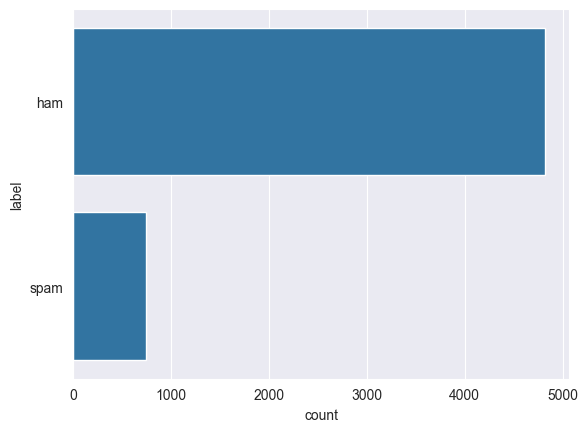

In [11]:
sns.countplot(df1["label"])

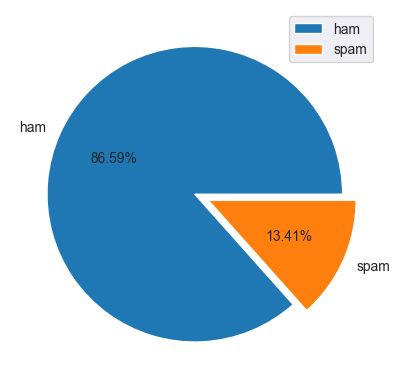

In [12]:
plt.pie(df1["label"].value_counts(),explode=[0,0.1],labels=df["label"].value_counts().index,autopct="%2.2f%%")
plt.legend()
plt.show()

In [13]:
#input variable
x=df1["text"]
#output variable
y=df1["label"]

In [14]:
swords = stopwords.words("english")
ps =PorterStemmer()
wnl = WordNetLemmatizer()

In [15]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2=[token for token in tokens1 if token.isalpha()]
    tokens3=[ps.stem(token.lower()) for token in tokens2 if token.lower() not in swords]
    # tokens3=[wnl.lemmatize(token.lower()) for token in tokens2 if token.lower() not in swords]
    return tokens3

In [16]:
sent ="Hello friends! How are you? Welcome to Python Programming"

In [17]:
clean_text(sent)

['hello', 'friend', 'welcom', 'python', 'program']

In [18]:
def clean_text2(sent):
    tokens1 = word_tokenize(sent)
    tokens2=[token for token in tokens1 if token.isalpha()]
    tokens3=[token.lower() for token in tokens2 if token.lower() not in swords]
    tags=pos_tag(tokens3)
    tokens4=[]
    for word in tags:
        if word[1].startswith("N"):
            tokens4.append(wnl.lemmatize(word[0],pos="n"))
        if word[1].startswith("V"):
            tokens4.append(wnl.lemmatize(word[0],pos="v"))
        if word[1].startswith("J"):
            tokens4.append(wnl.lemmatize(word[0],pos="a"))
    return tokens4

In [19]:
clean_text2(sent)

['hello', 'friends', 'welcome', 'python', 'programming']

In [20]:
pos_tag(["friends"])

[('friends', 'NNS')]

In [21]:
tags=pos_tag(word_tokenize(sent))
tokens4=[]
for word in tags:
    #print(word[0],word[1])
    if word[1].startswith("N"):
        tokens4.append(wnl.lemmatize(word[0],pos="n"))
    elif word[1].startswith("V"):
        tokens4.append(wnl.lemmatize(word[0],pos="v"))
    elif word[1].startswith("J"):
        tokens4.append(wnl.lemmatize(word[0],pos="a"))
    else:
        tokens4.append(word[0])

In [22]:
tokens4

['Hello',
 'friends',
 '!',
 'How',
 'be',
 'you',
 '?',
 'Welcome',
 'to',
 'Python',
 'Programming']

In [23]:
pos_tag(word_tokenize(sent))

[('Hello', 'NNP'),
 ('friends', 'VBZ'),
 ('!', '.'),
 ('How', 'WRB'),
 ('are', 'VBP'),
 ('you', 'PRP'),
 ('?', '.'),
 ('Welcome', 'VB'),
 ('to', 'TO'),
 ('Python', 'NNP'),
 ('Programming', 'NNP')]

In [24]:
# pip install wordcloud

In [25]:
ham =x[y=="ham"]
spam=x[y=="spam"]

In [26]:
ham.shape
spam.shape

(747,)

In [27]:
ham_st="".join(ham)
ham_st

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...U dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneI\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today.I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.I HAVE A DATE ON SUNDAY WITH WILL!!Oh k...i\'m watching here:)Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.Fine if that\x92s the way u feel. That\x92s the way its g

In [28]:
spam_st="".join(spam)
spam_st

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'sFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcvWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 infoURGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or clic

In [29]:
#spamst=spam.sum()
#hamst=ham.sum()

In [30]:
len(spam_st)

103587

In [31]:
len(ham_st)

344903

In [32]:
wc_spam=WordCloud(background_color="white",max_words=50).generate(spam_st)

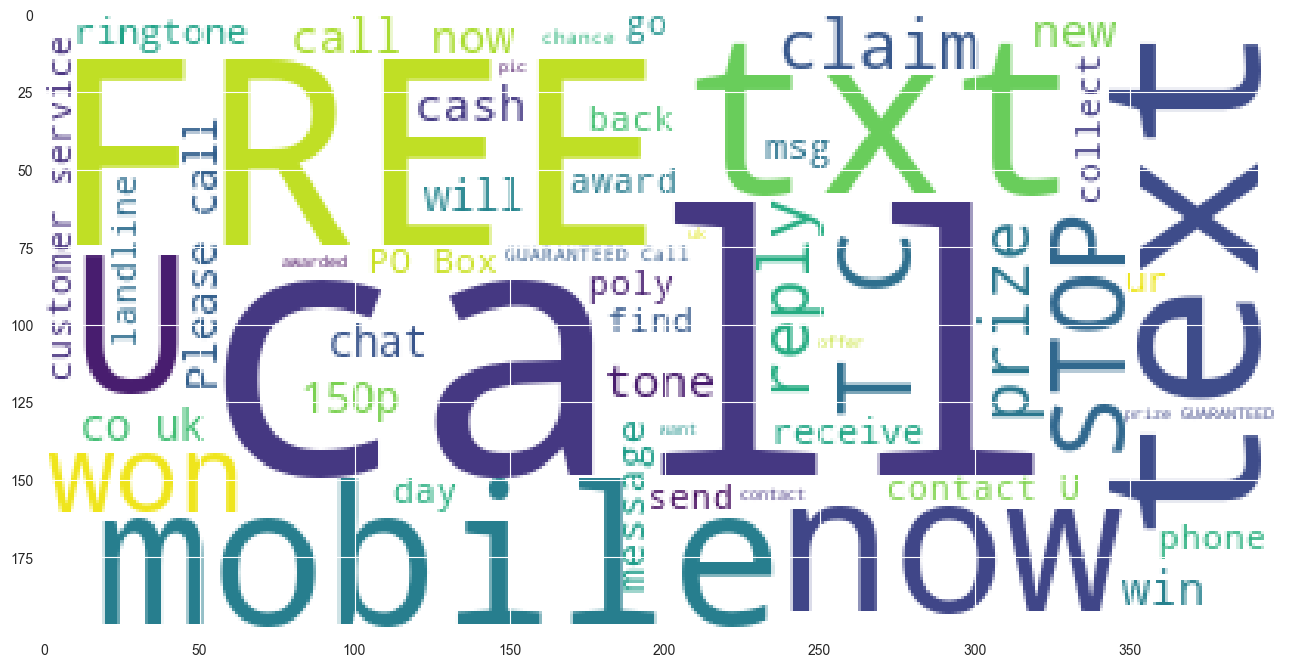

In [33]:
plt.figure(figsize=(16,9))
plt.imshow(wc_spam)

In [34]:
wc_ham=WordCloud(background_color="white",max_words=50).generate(ham_st)

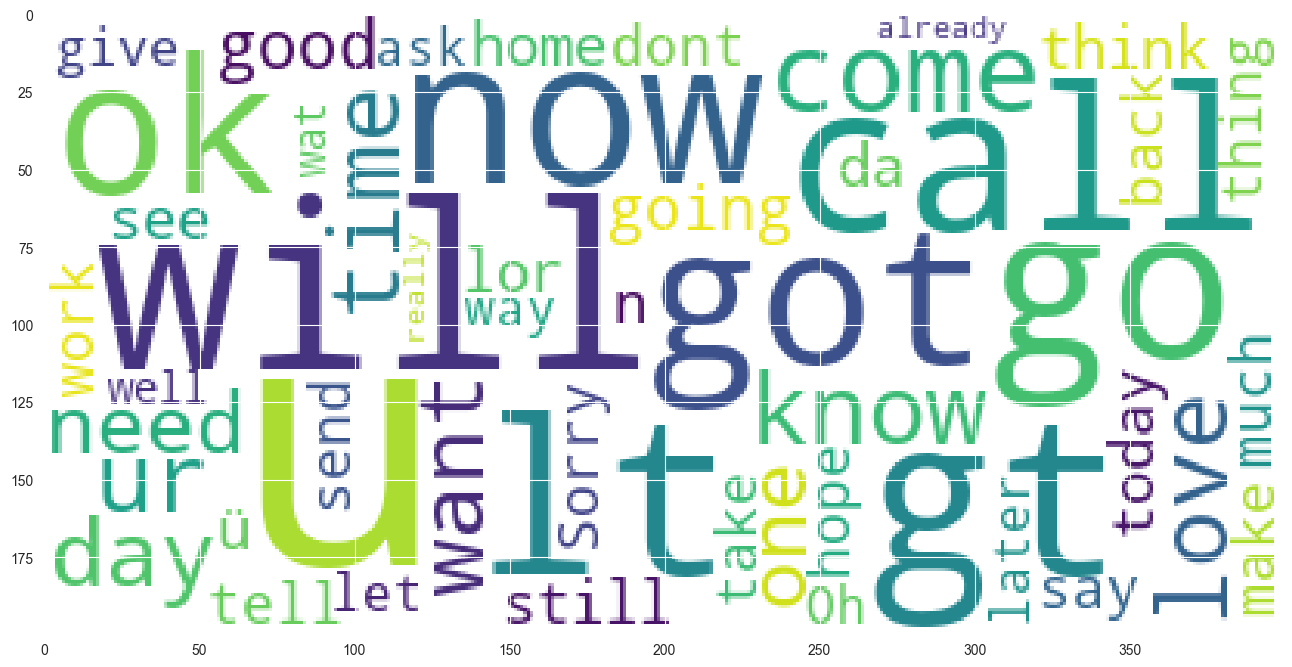

In [35]:
plt.figure(figsize=(16,9))
plt.imshow(wc_ham)

In [36]:
x.apply(clean_text2)

0       [go, jurong, point, crazy, available, bugis, g...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3                    [u, dun, say, early, hor, u, c, say]
4                                  [think, go, usf, life]
                              ...                        
5567    [time, try, contact, u, pound, prize, claim, e...
5568                      [ü, b, go, esplanade, fr, home]
5569                             [pity, mood, suggestion]
5570    [guy, bitch, act, interested, buying, somethin...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

In [37]:
tfidf=TfidfVectorizer(analyzer=clean_text2)

In [38]:
x_vect=tfidf.fit_transform(x)

In [39]:
x_vect.shape

(5572, 5930)

In [40]:
X_train,X_test,y_train,y_test=train_test_split(x_vect,y,random_state=0)

In [41]:
X_train.shape

(4179, 5930)

In [42]:
X_test.shape

(1393, 5930)

## **Build the model**


In [43]:
from sklearn.metrics import accuracy_score,classification_report


svm=SVC(kernel="linear")
svm.fit(X_train,y_train)
y_pred=svm.predict((X_test))
accuracy_score(y_test,y_pred)

0.9849246231155779

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.89      0.94       185

    accuracy                           0.98      1393
   macro avg       0.99      0.95      0.97      1393
weighted avg       0.99      0.98      0.98      1393



In [45]:
svm=SVC()
svm.fit(X_train,y_train)
y_pred=svm.predict((X_test))
accuracy_score(y_test,y_pred)

0.9798994974874372

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       1.00      0.85      0.92       185

    accuracy                           0.98      1393
   macro avg       0.99      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [47]:
svm=SVC(kernel="poly")
svm.fit(X_train,y_train)
y_pred=svm.predict((X_test))
accuracy_score(y_test,y_pred)

0.9483129935391242

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1208
        spam       1.00      0.61      0.76       185

    accuracy                           0.95      1393
   macro avg       0.97      0.81      0.86      1393
weighted avg       0.95      0.95      0.94      1393



In [49]:
svm=SVC(kernel="sigmoid")
svm.fit(X_train,y_train)
y_pred=svm.predict((X_test))
accuracy_score(y_test,y_pred)

0.9820531227566404

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [52]:
with open(r"D:\NLPDS\sample.csv","r") as f1:
    a=f1.readlines()


In [53]:
svm.predict(tfidf.transform(a))

array(['ham', 'spam', 'ham'], dtype=object)

Model Saving

In [54]:
joblib.dump(svm,"classifier.model")
joblib.dump(tfidf,'preprocessor.model')

['preprocessor.model']